<a href="https://colab.research.google.com/github/Ajey3/365-Days-of-AI/blob/main/llmlight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install torch torchvision


Epoch 1, Loss: 1.004737097634944
Epoch 2, Loss: 0.37776738338506044
Epoch 3, Loss: 0.3219600946171833
Epoch 4, Loss: 0.2920578260745194
Epoch 5, Loss: 0.26686996129402984
Training complete!


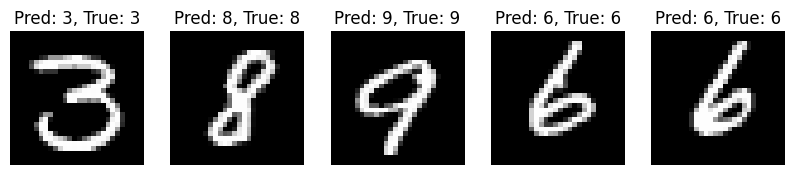

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
# Download the MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Step 2: Define the Neural Network Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer to hidden layer
        self.fc2 = nn.Linear(128, 64)       # Hidden layer
        self.fc3 = nn.Linear(64, 10)        # Output layer (10 classes for 0-9 digits)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # Activation function for hidden layer 1
        x = torch.relu(self.fc2(x))  # Activation function for hidden layer 2
        x = self.fc3(x)              # Output layer
        return x

# Step 3: Initialize Model, Loss Function, and Optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Optimizer

# Step 4: Train the Model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()          # Clear gradients
        output = model(images)         # Forward pass
        loss = criterion(output, labels)  # Compute loss
        loss.backward()                # Backward pass
        optimizer.step()               # Update weights

        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

print("Training complete!")

# Step 5: Visualize Some Results
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Change from dataiter.next() to next(dataiter)
output = model(images)
_, preds = torch.max(output, 1)

# Show images with predicted and actual labels
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(images[i].numpy().squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {preds[i].item()}, True: {labels[i].item()}")
    axes[i].axis('off')
plt.show()



